<AxesSubplot:xlabel='Signal', ylabel='Density'>

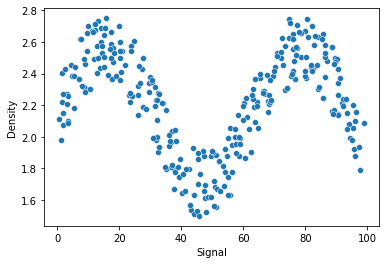

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('rock_density_xray.csv')
df.columns = ['Signal','Density']
sns.scatterplot(x='Signal',y='Density',data=df)

In [21]:
x = df['Signal'].values.reshape(-1,1) # single feature
y = df['Density']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
def run_model(model,x_train,x_test,y_train,y_test):
    
    model.fit(x_train,y_train)
    
    preds = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE:{mae}')
    print(f'RMSE:{rmse}')
    
    signal_range =np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,signal_preds)

MAE:0.211198973318633
RMSE:0.2570051996584629


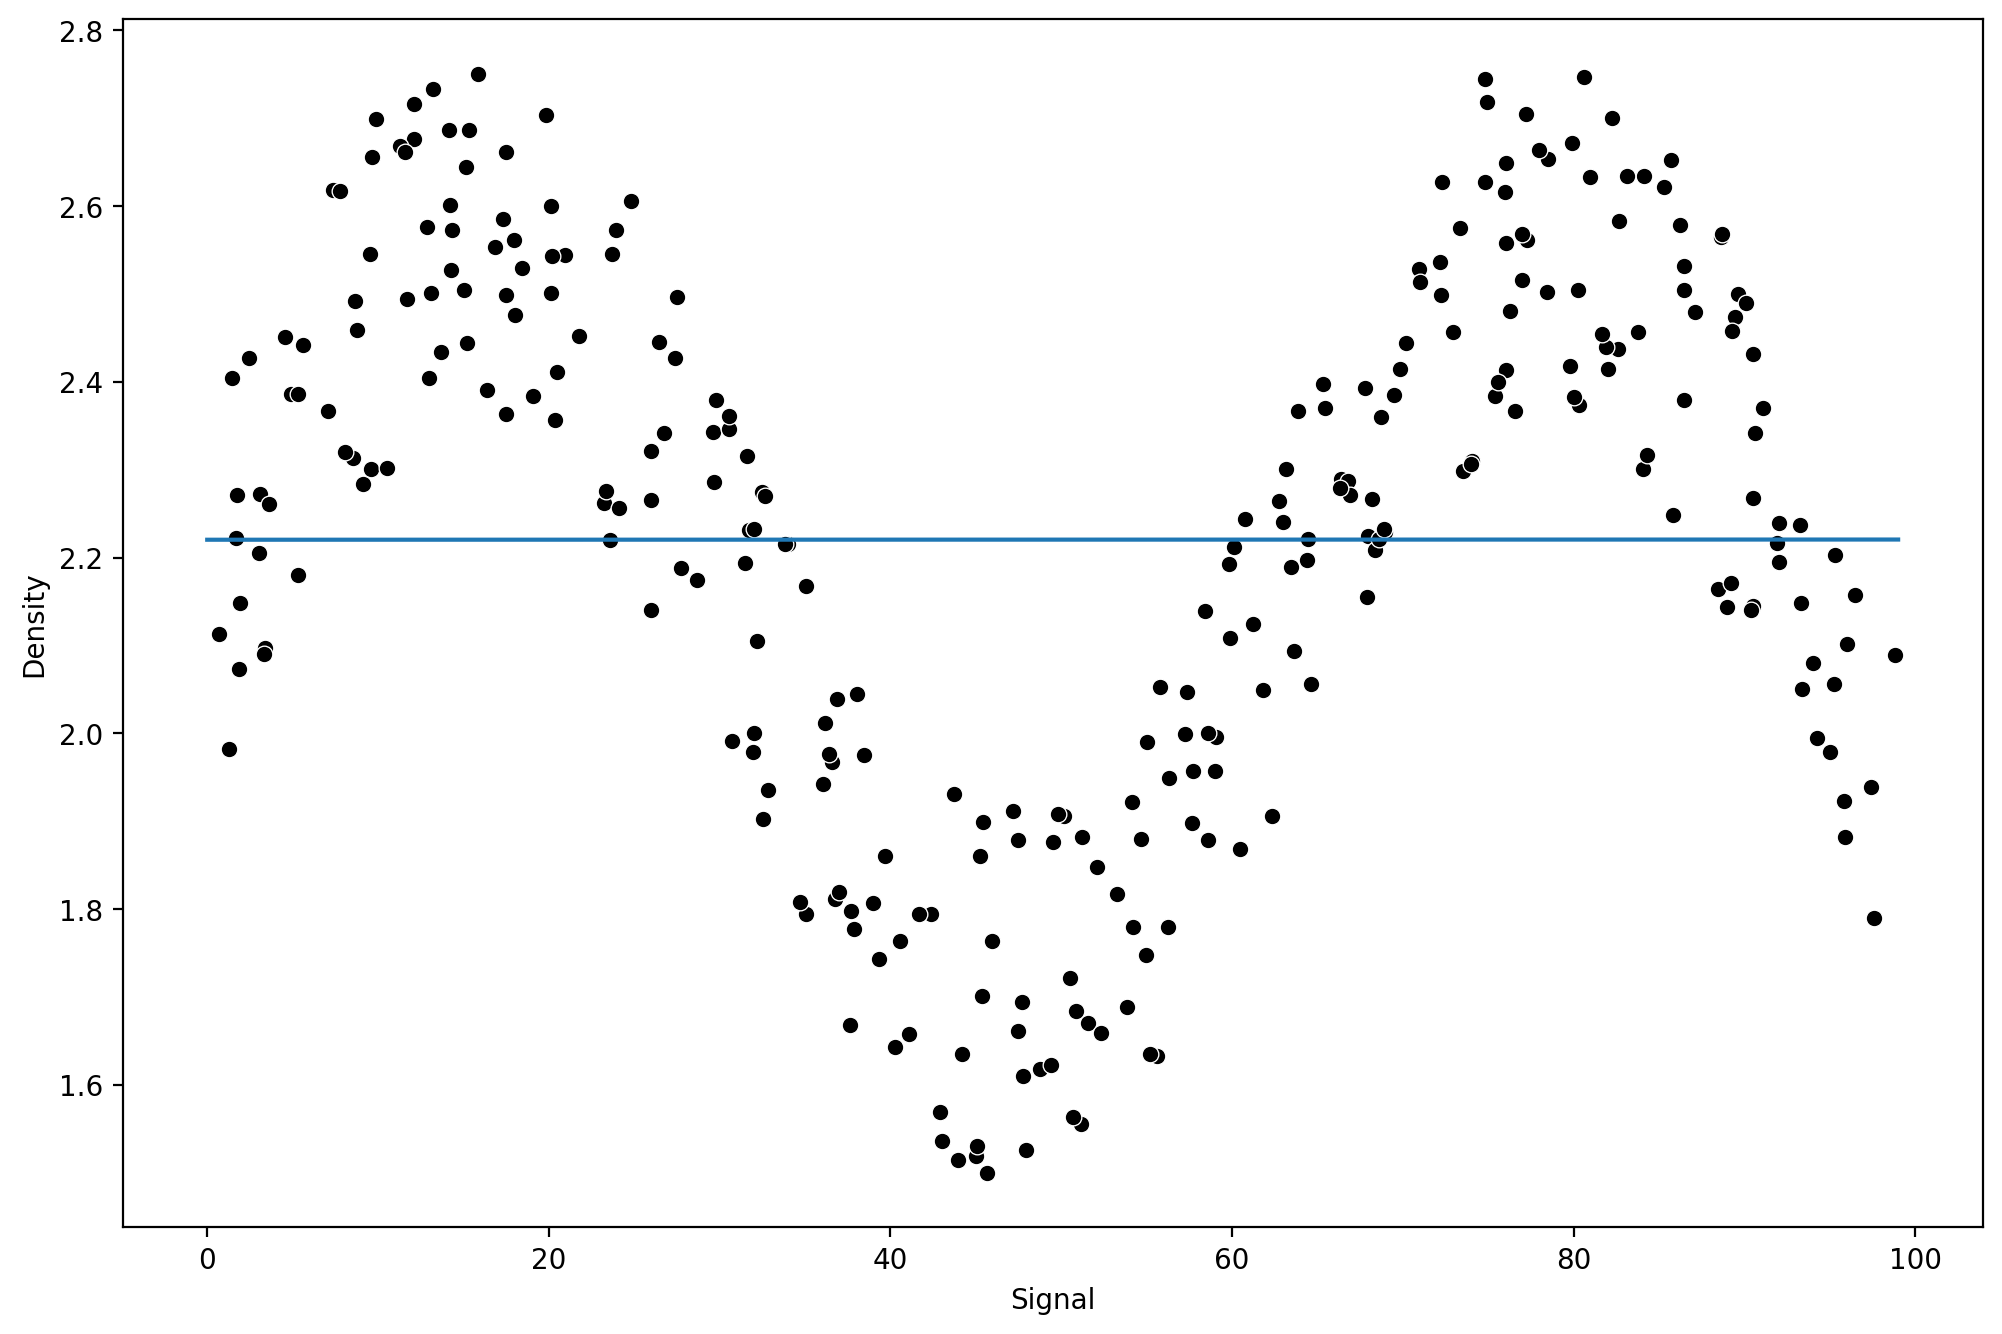

In [27]:
model = LinearRegression()
run_model(model,x_train,x_test,y_train,y_test)

MAE:0.11969085253552043
RMSE:0.13807383449323551


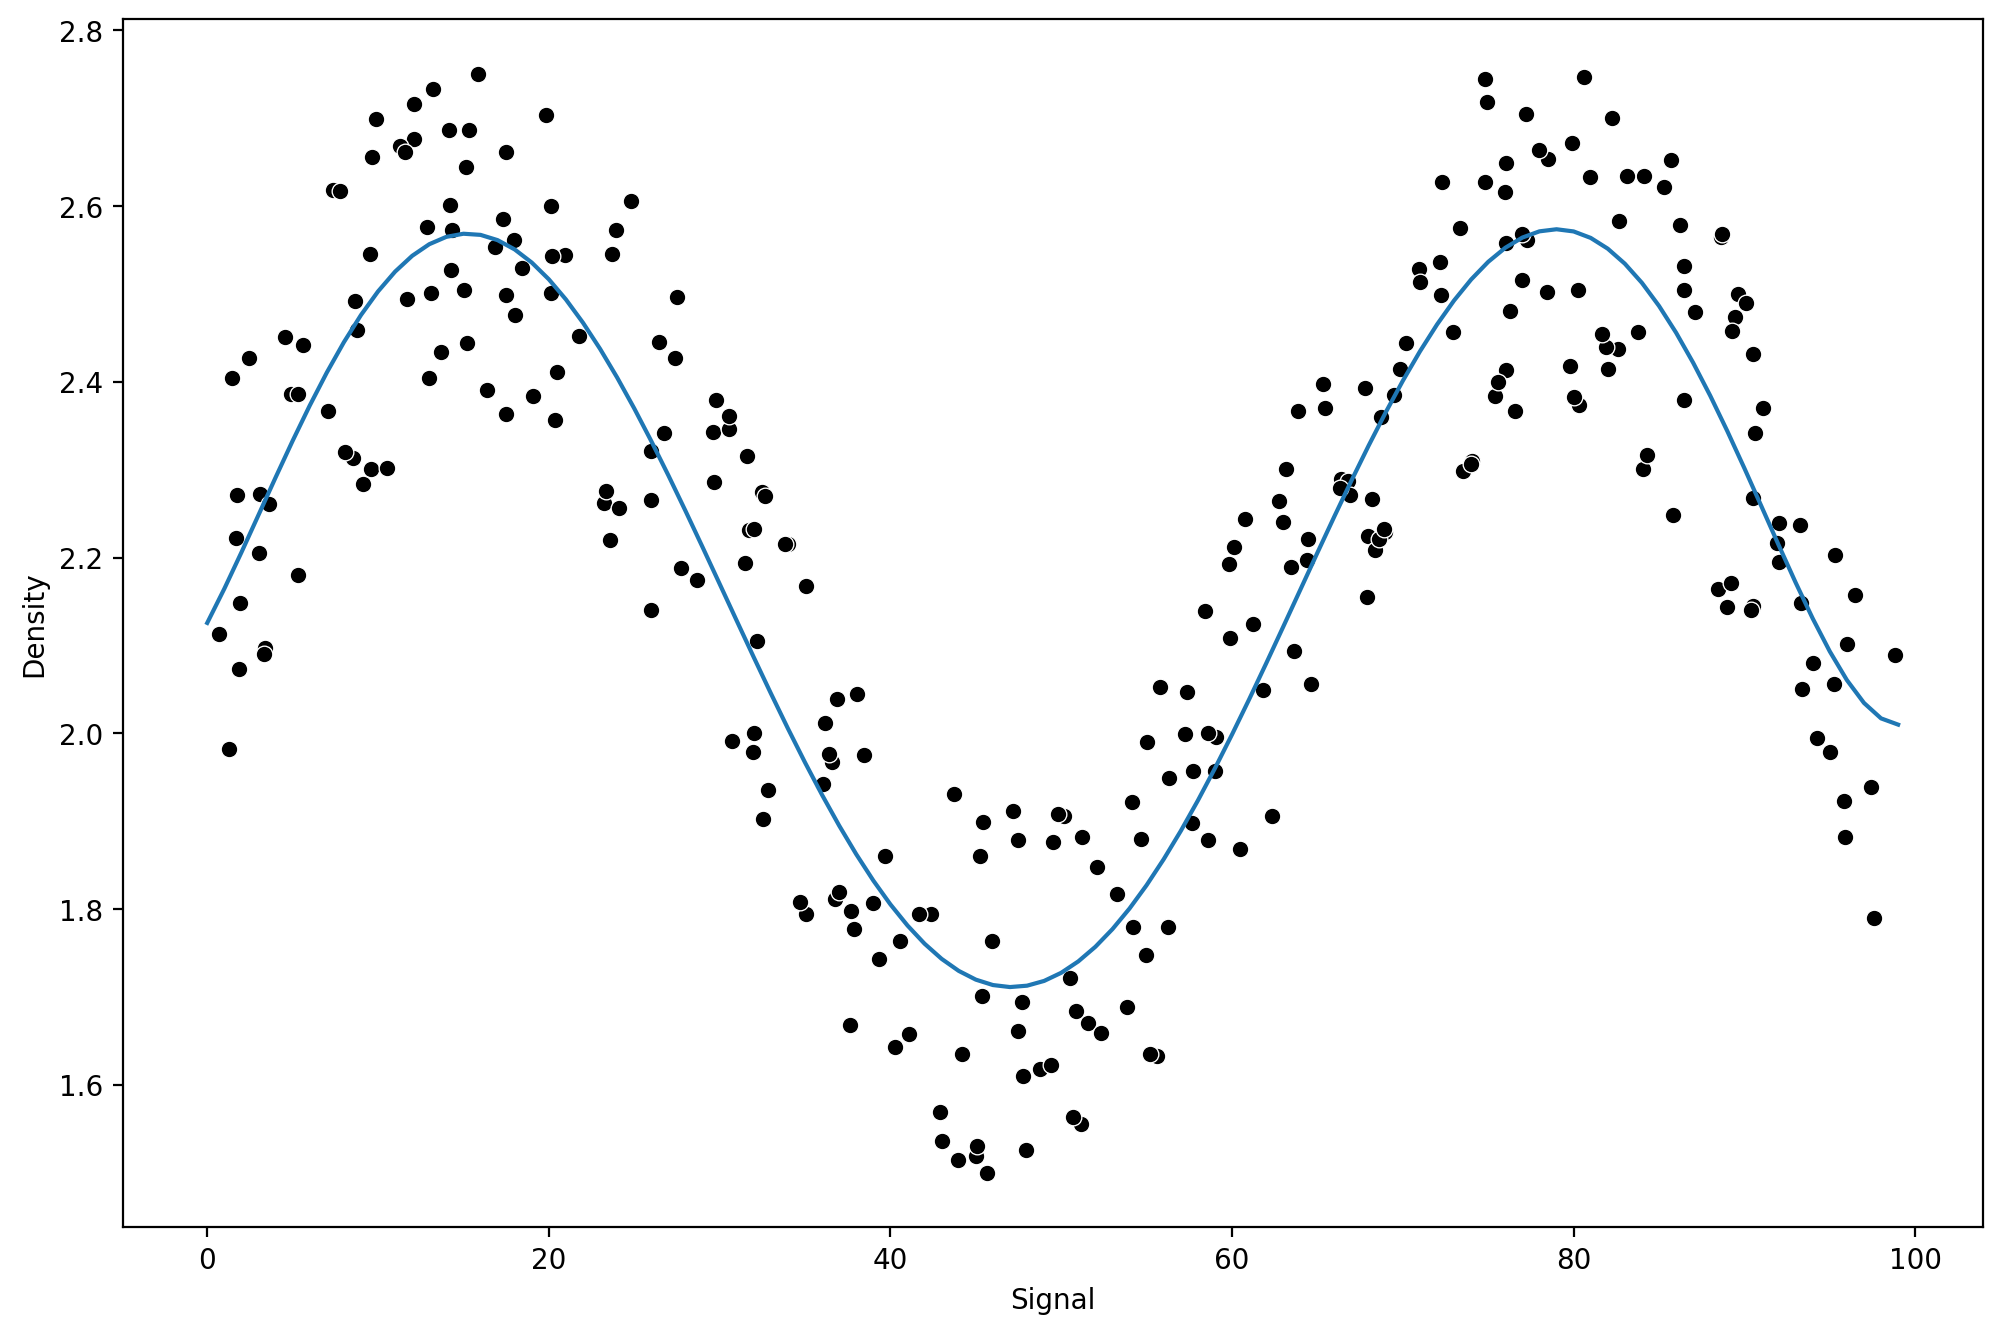

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())
run_model(pipe,x_train,x_test,y_train,y_test)

MAE:0.11877297474442378
RMSE:0.1523487028635337
MAE:0.12198383614100558
RMSE:0.13730685016923647
MAE:0.11635971693292672
RMSE:0.13277855732740926
MAE:0.1207030971917154
RMSE:0.1397499127378895


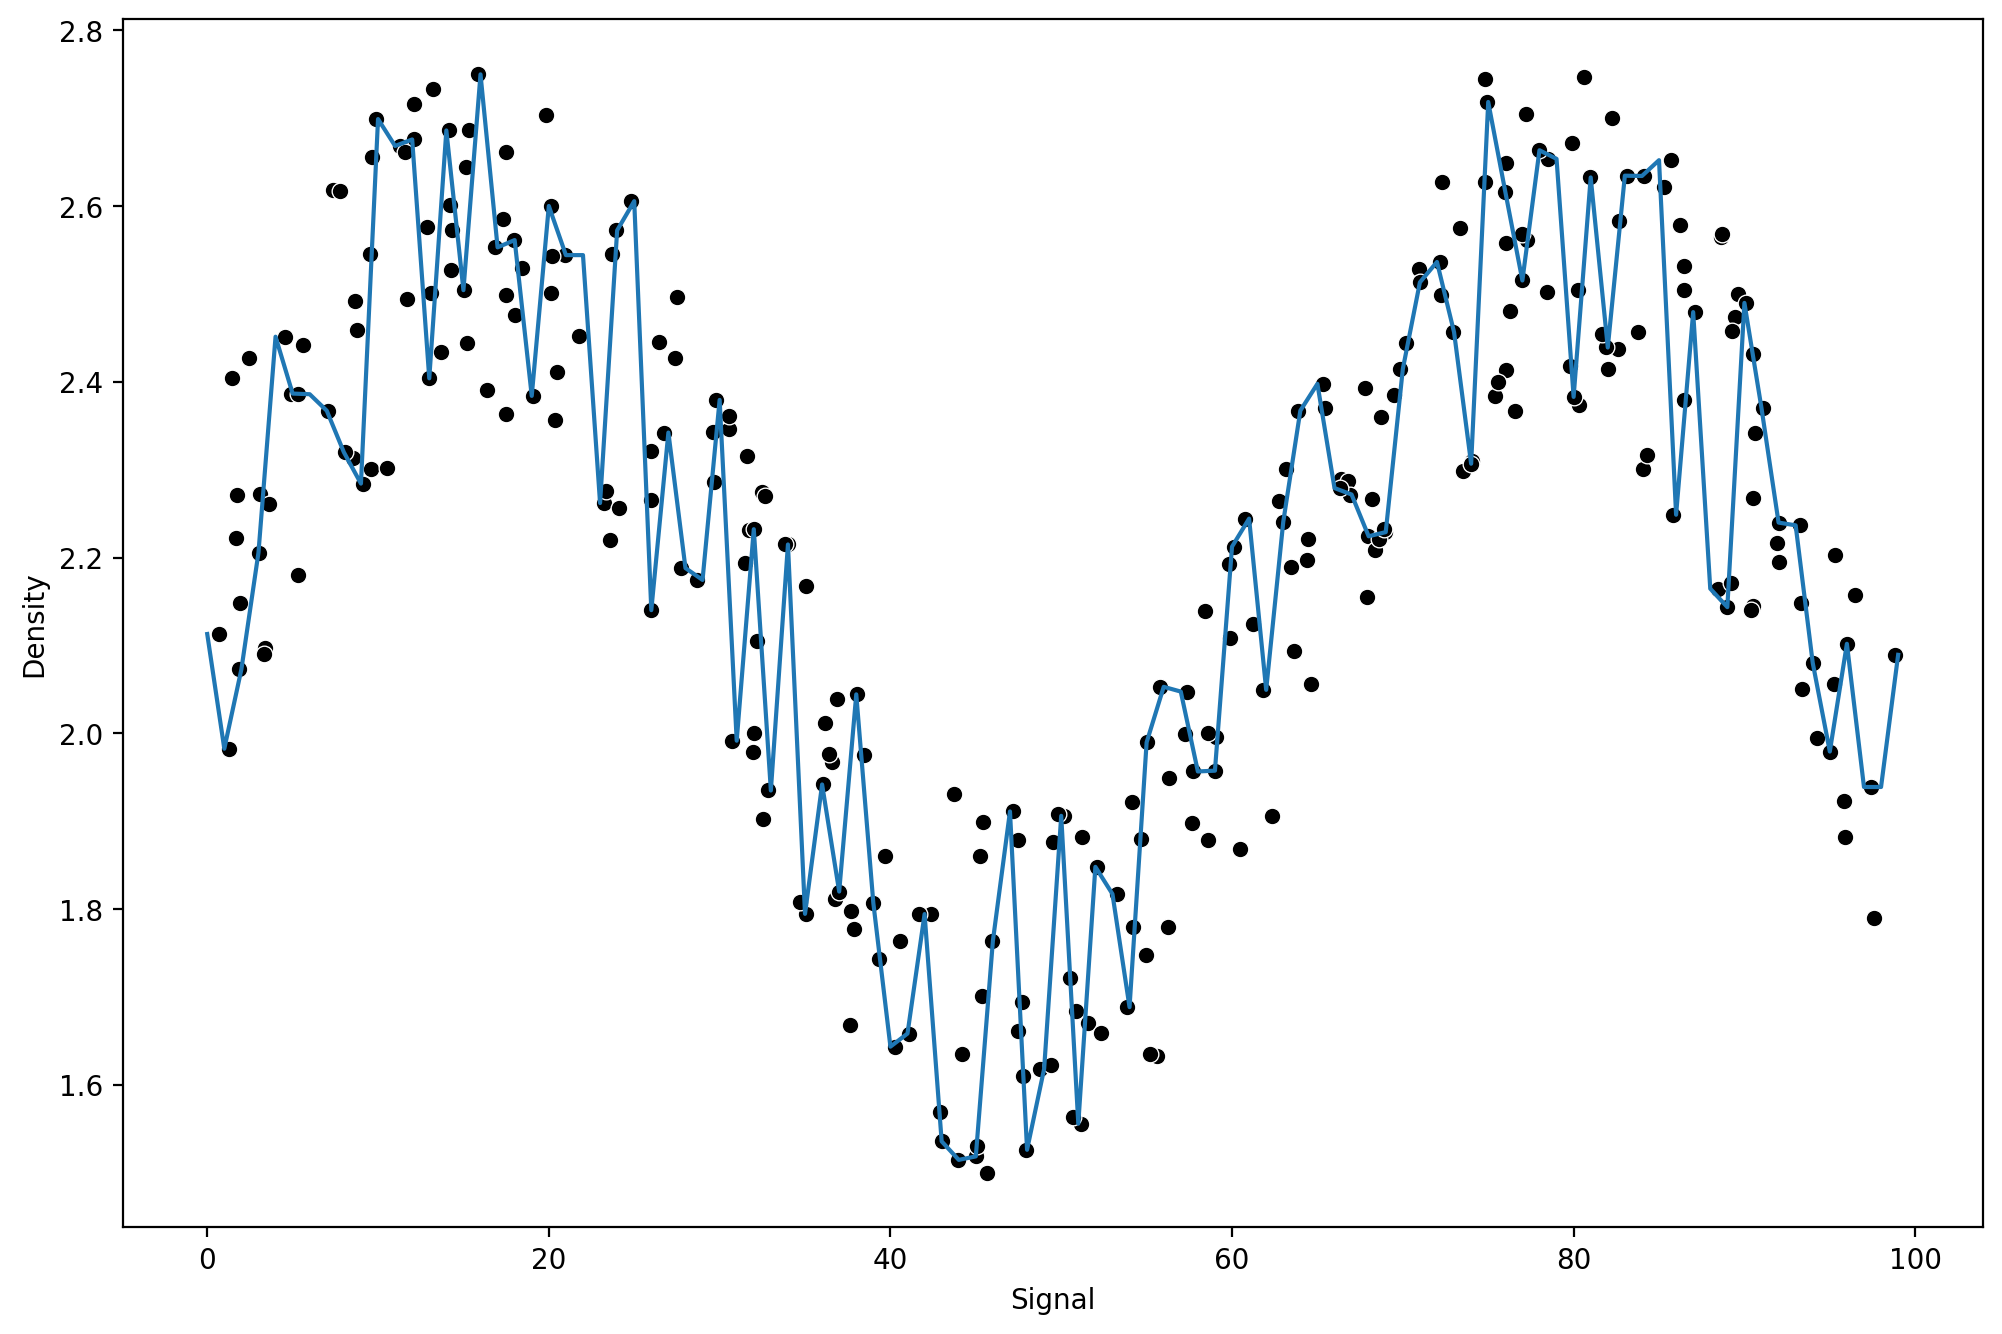

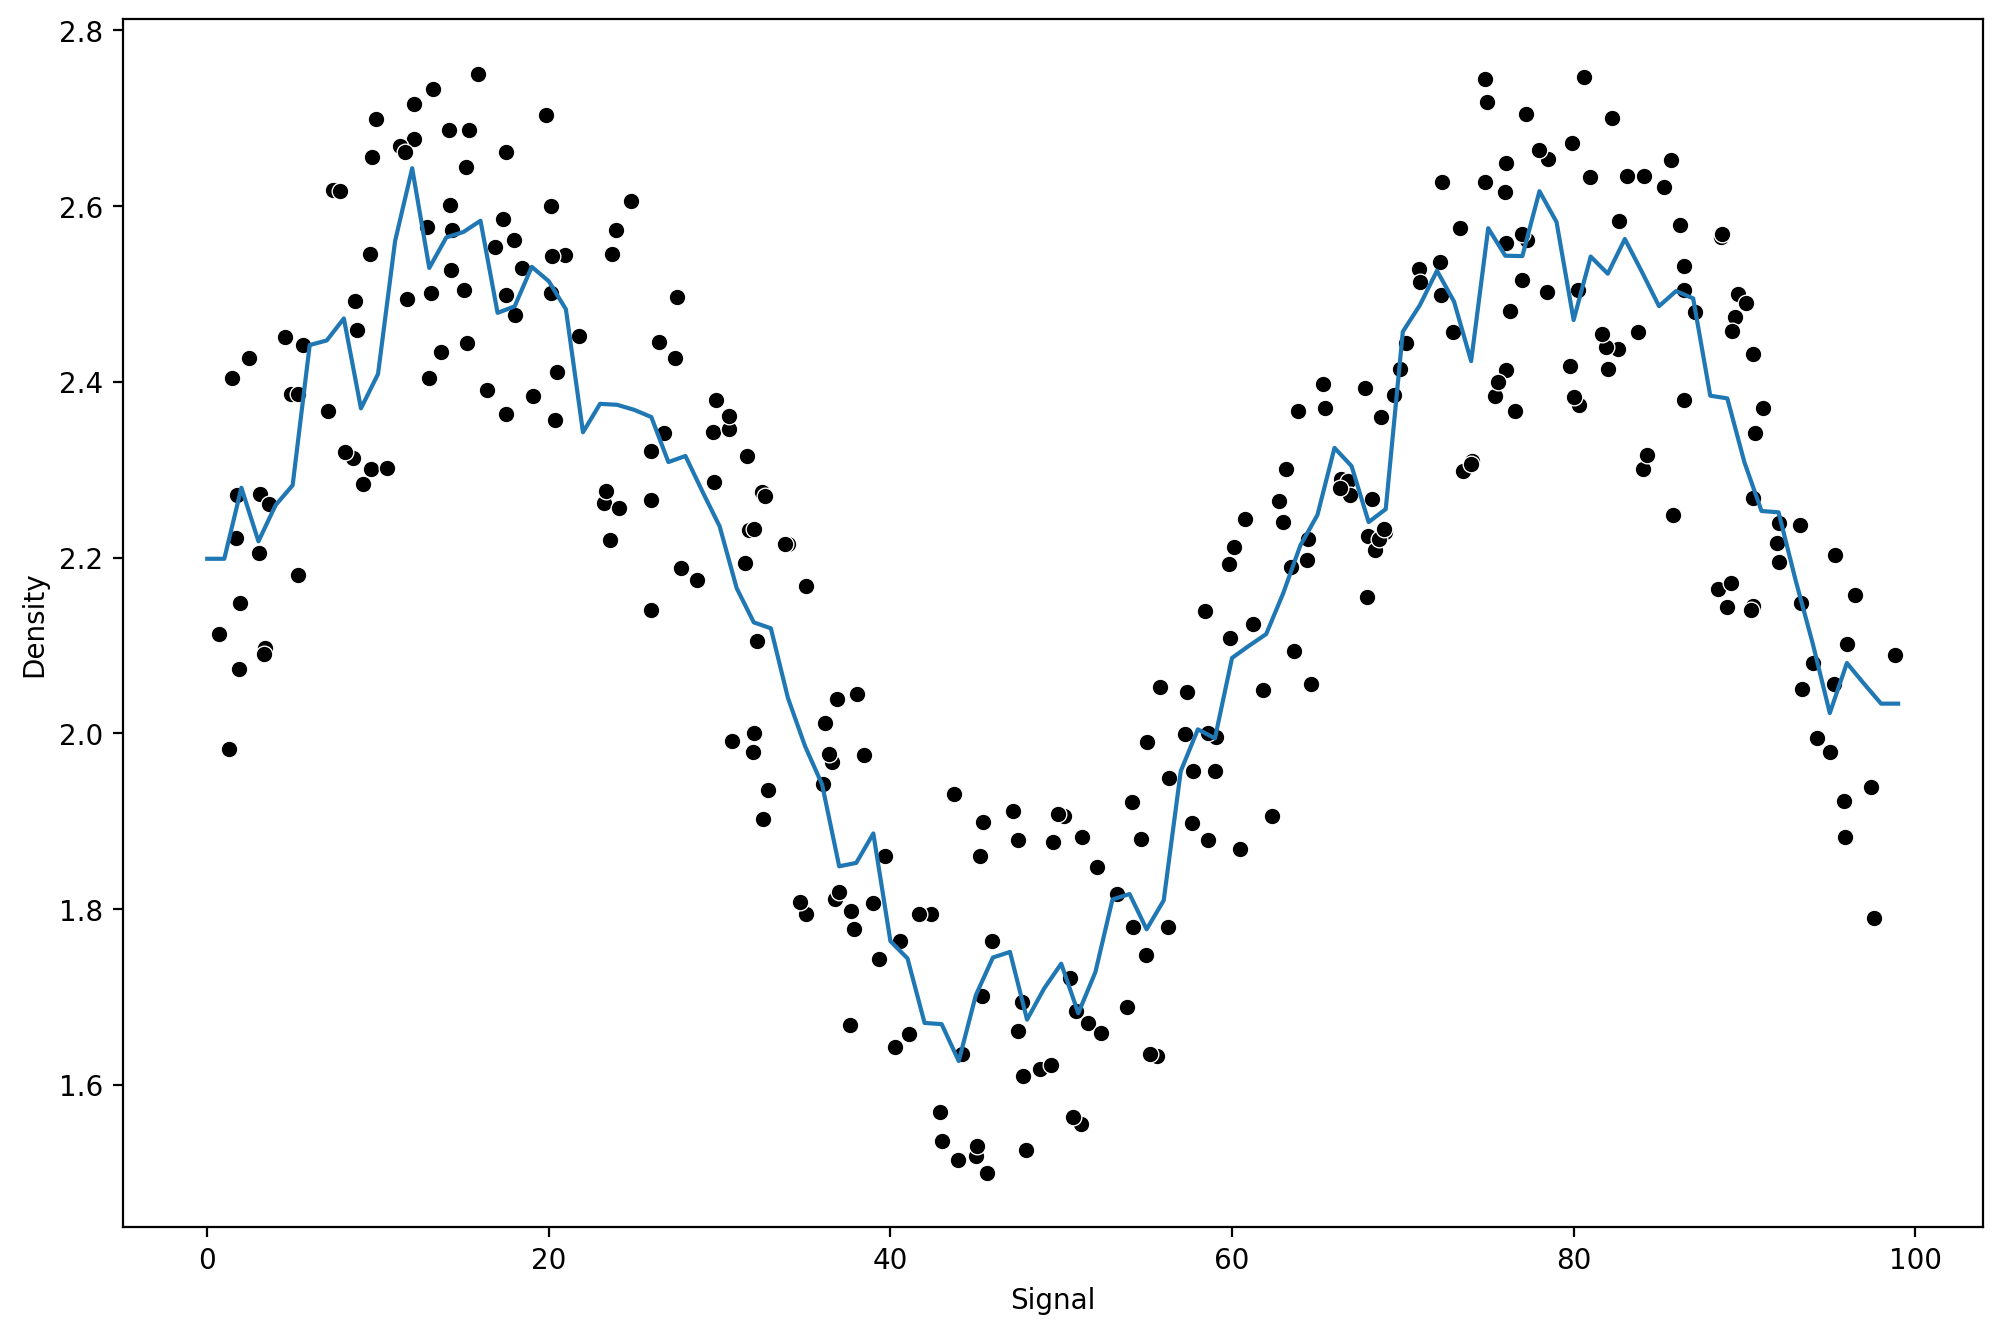

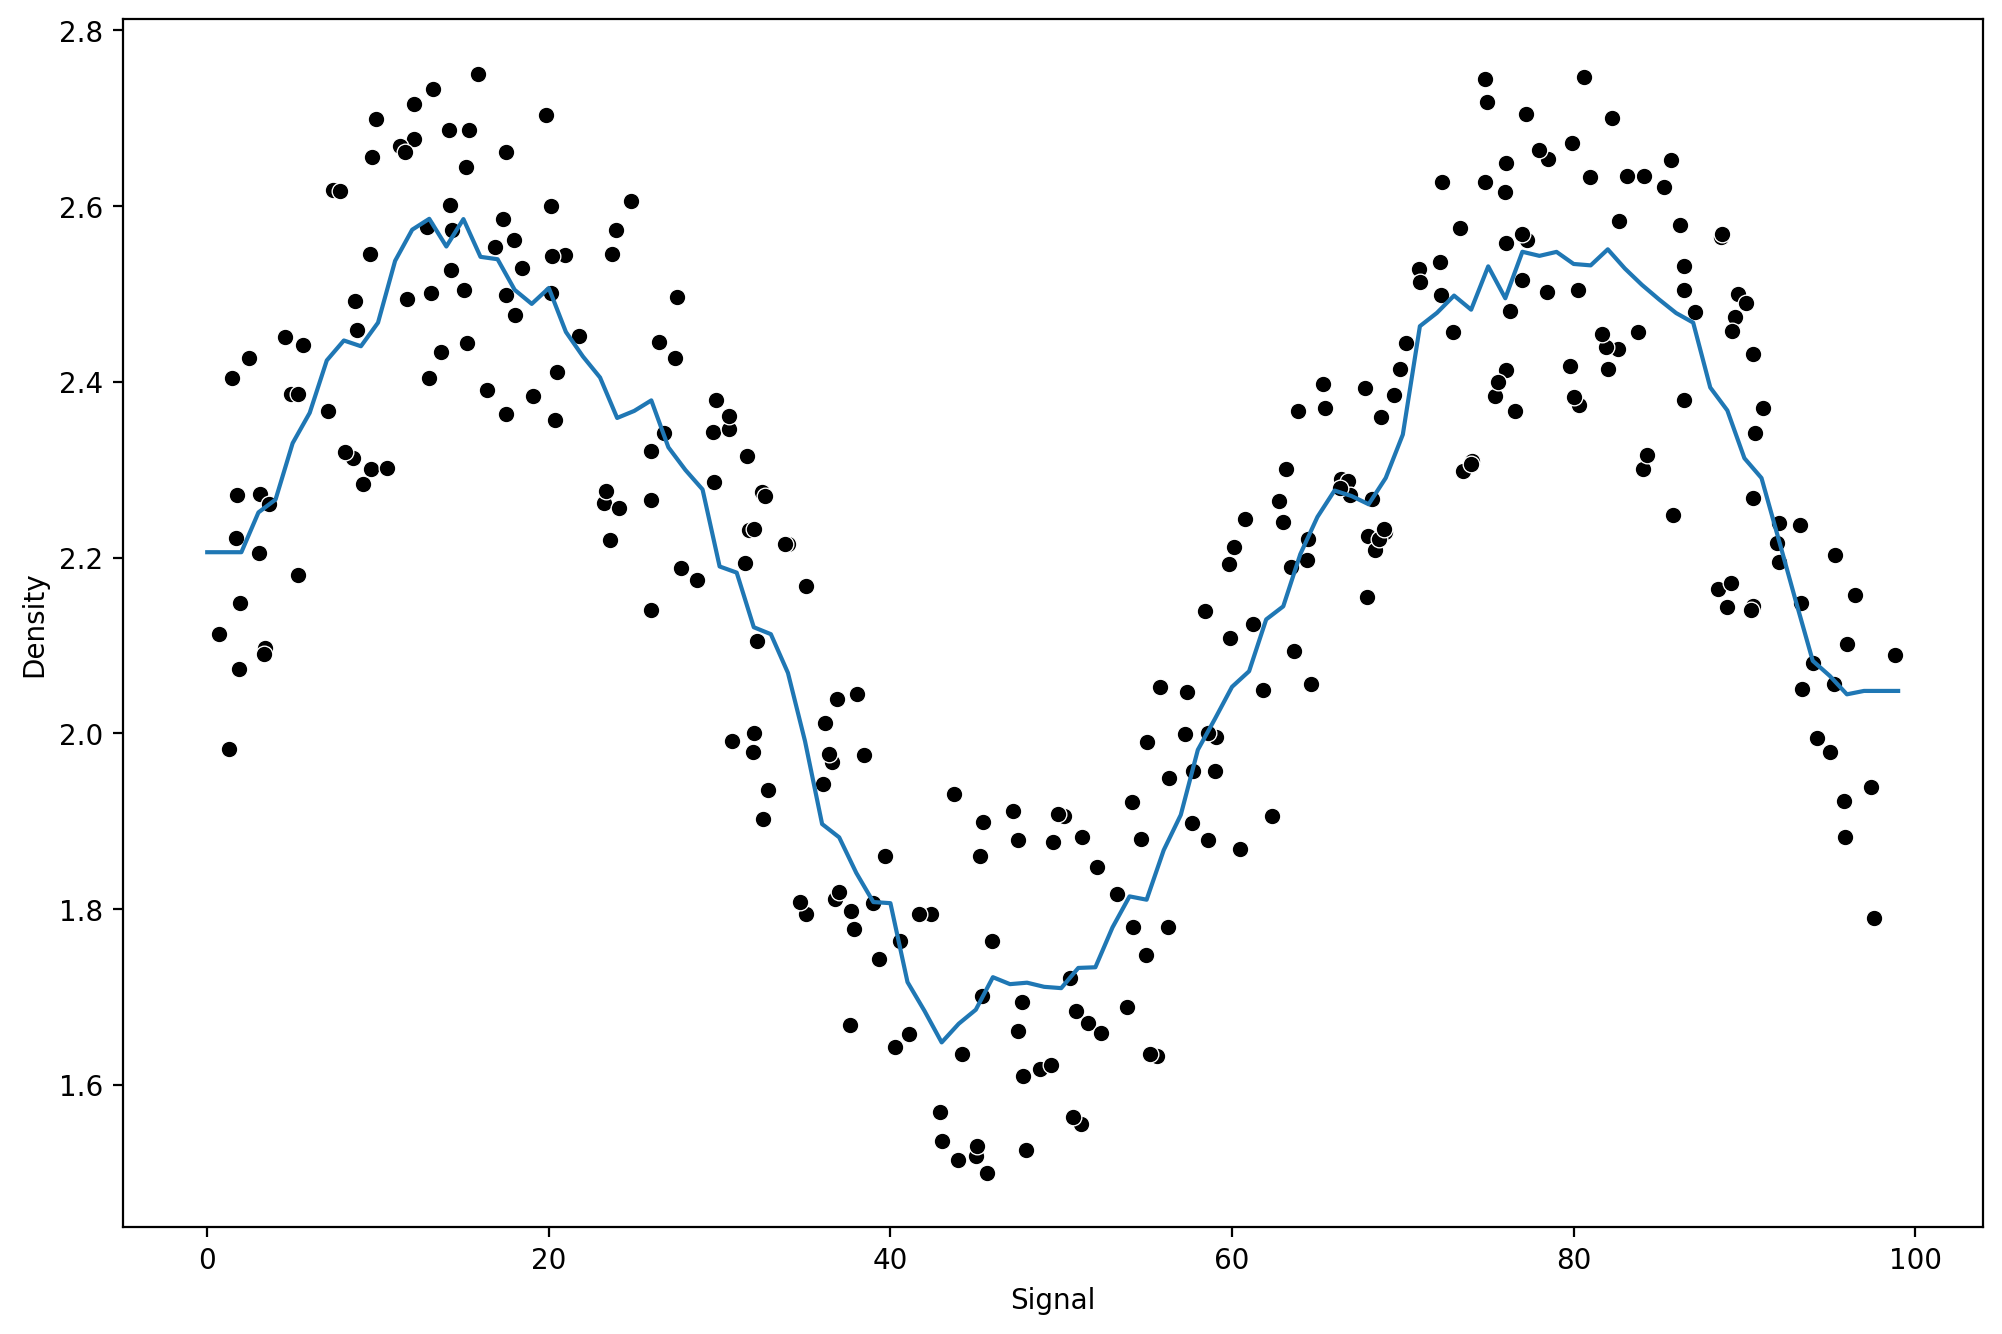

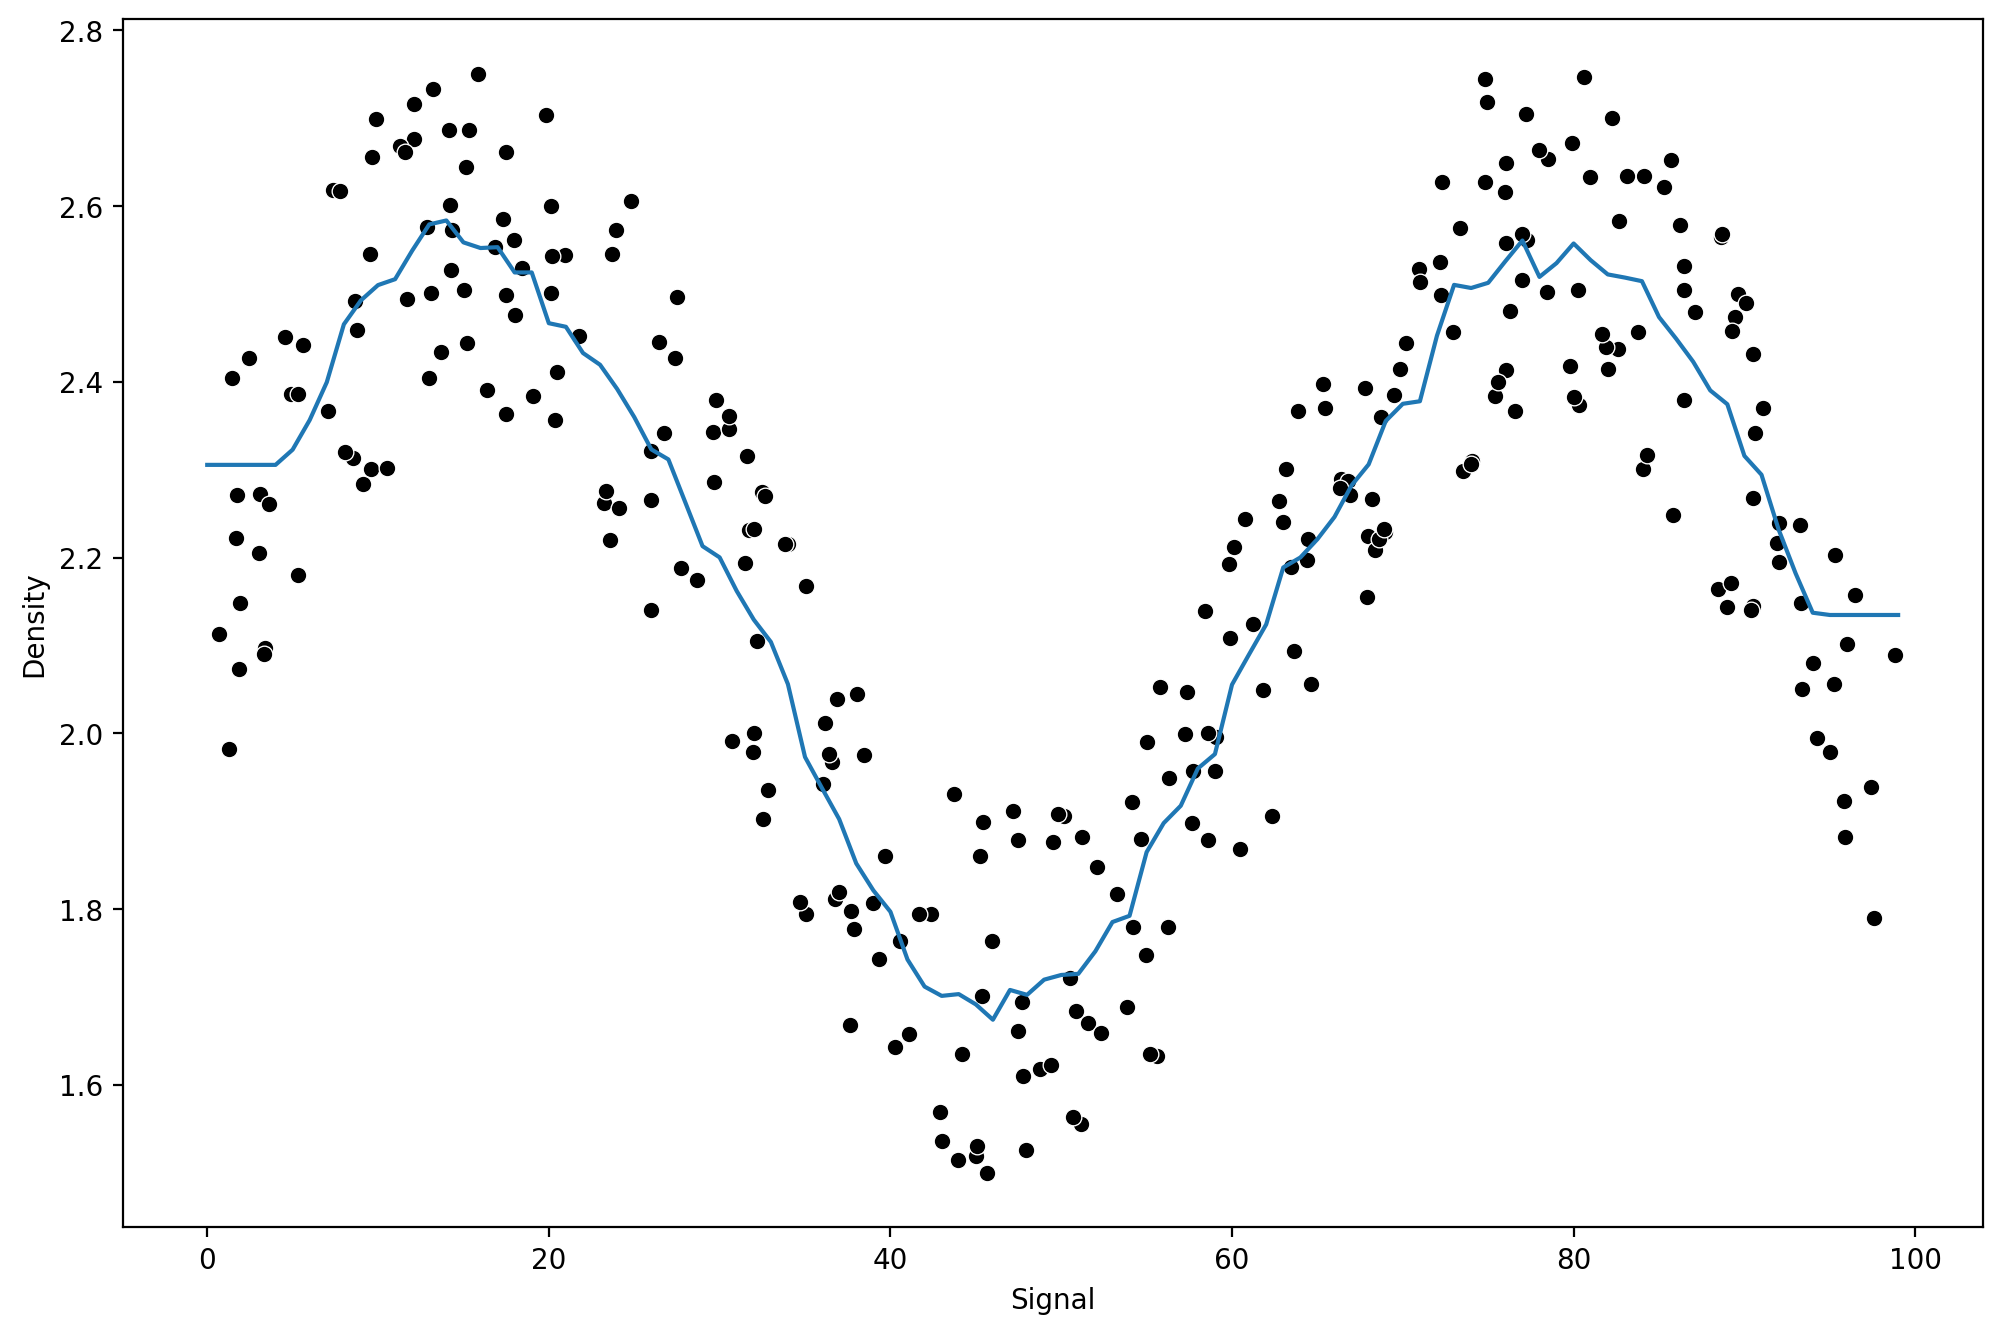

In [33]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10,20]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,x_train,x_test,y_train,y_test)

MAE:0.11877297474442378
RMSE:0.1523487028635337


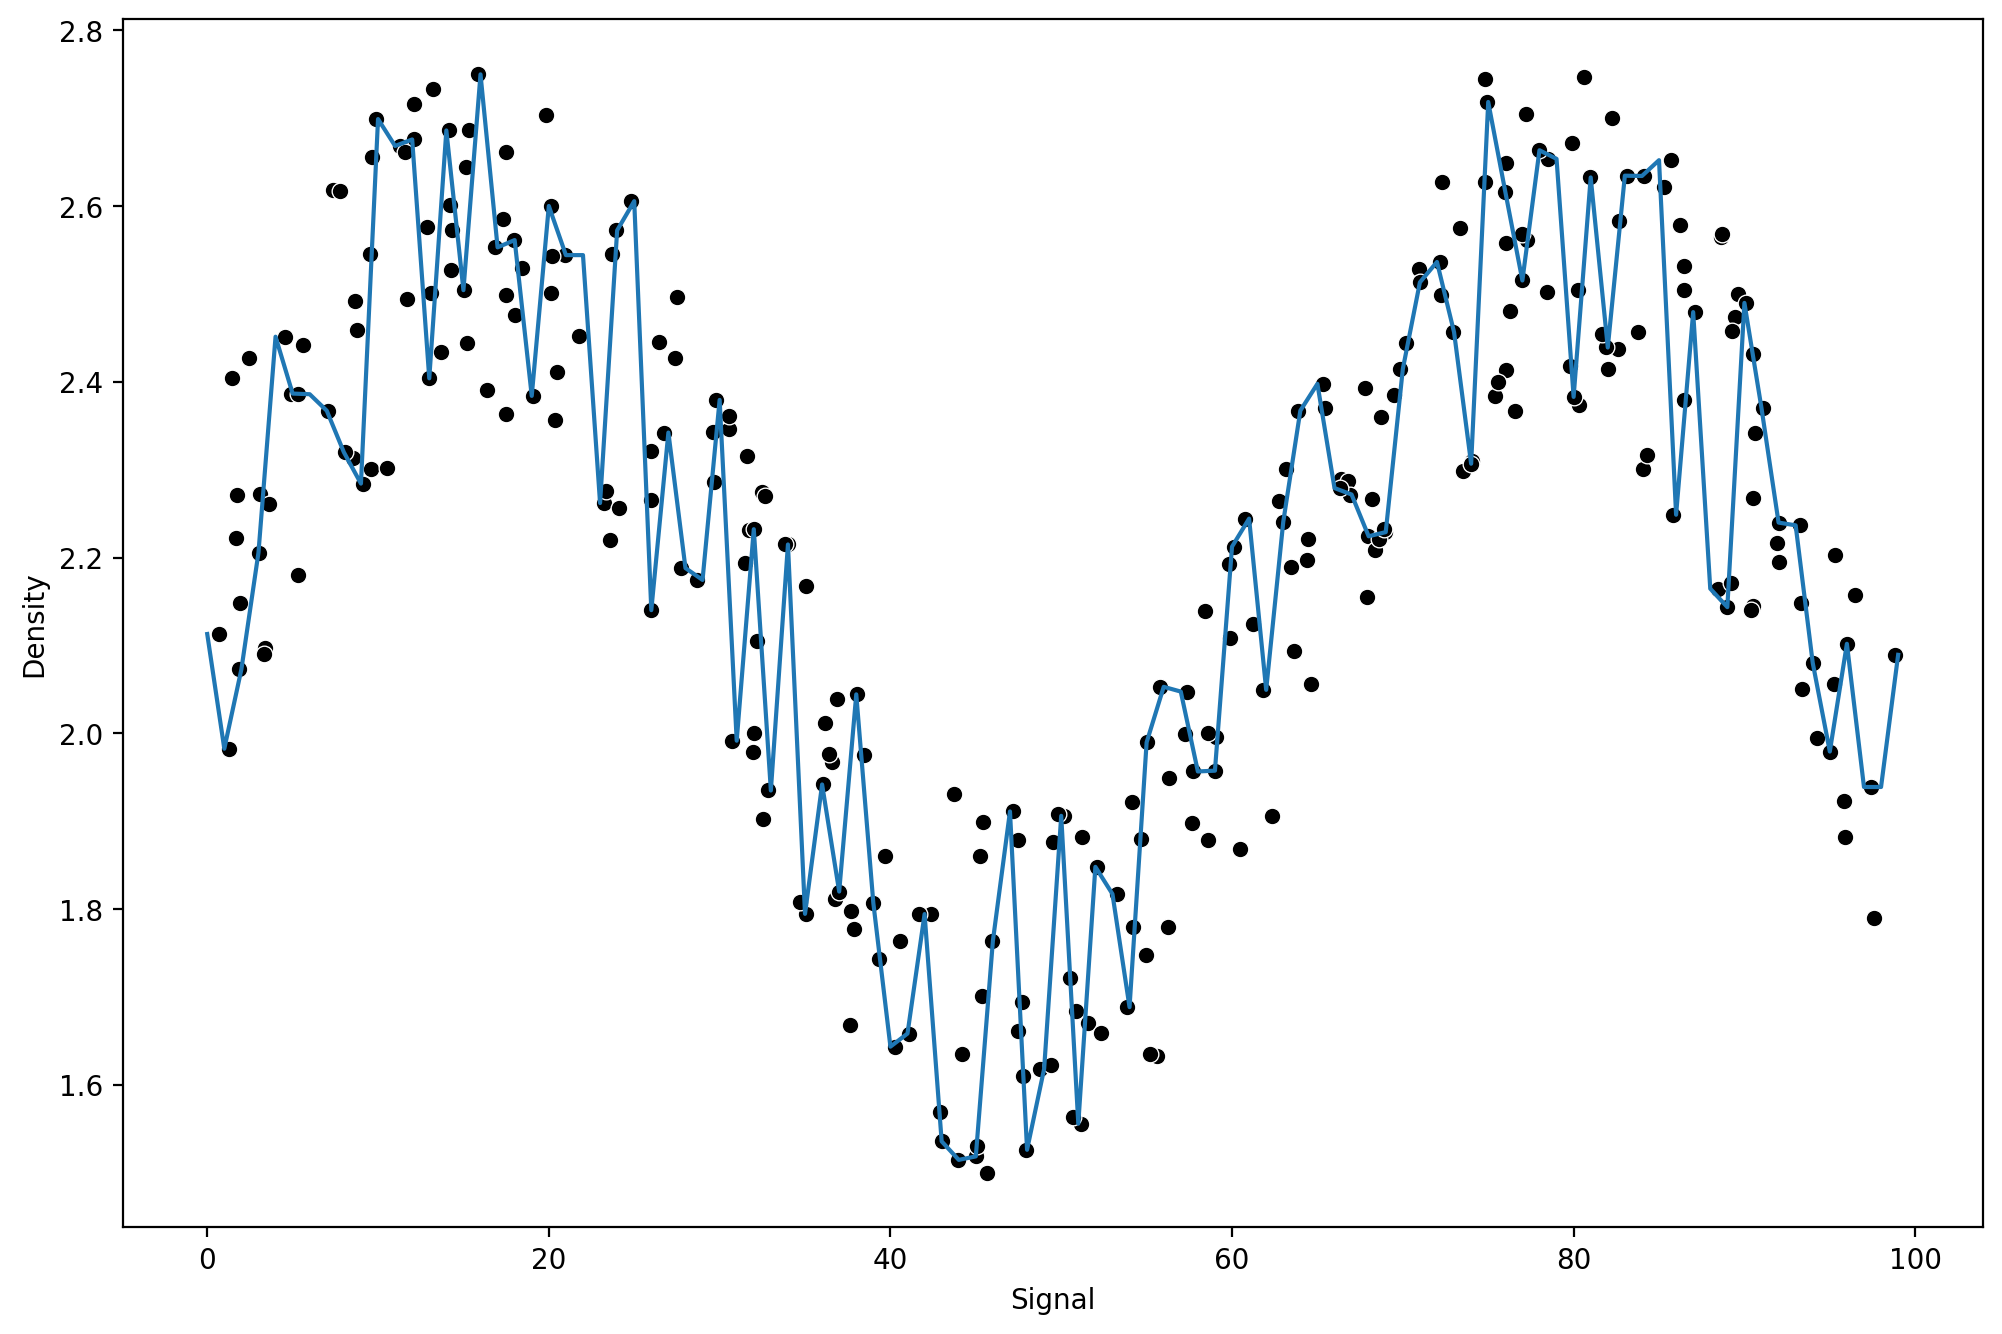

In [35]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model,x_train,x_test,y_train,y_test)

MAE:0.10854210121348368
RMSE:0.12646999302046696


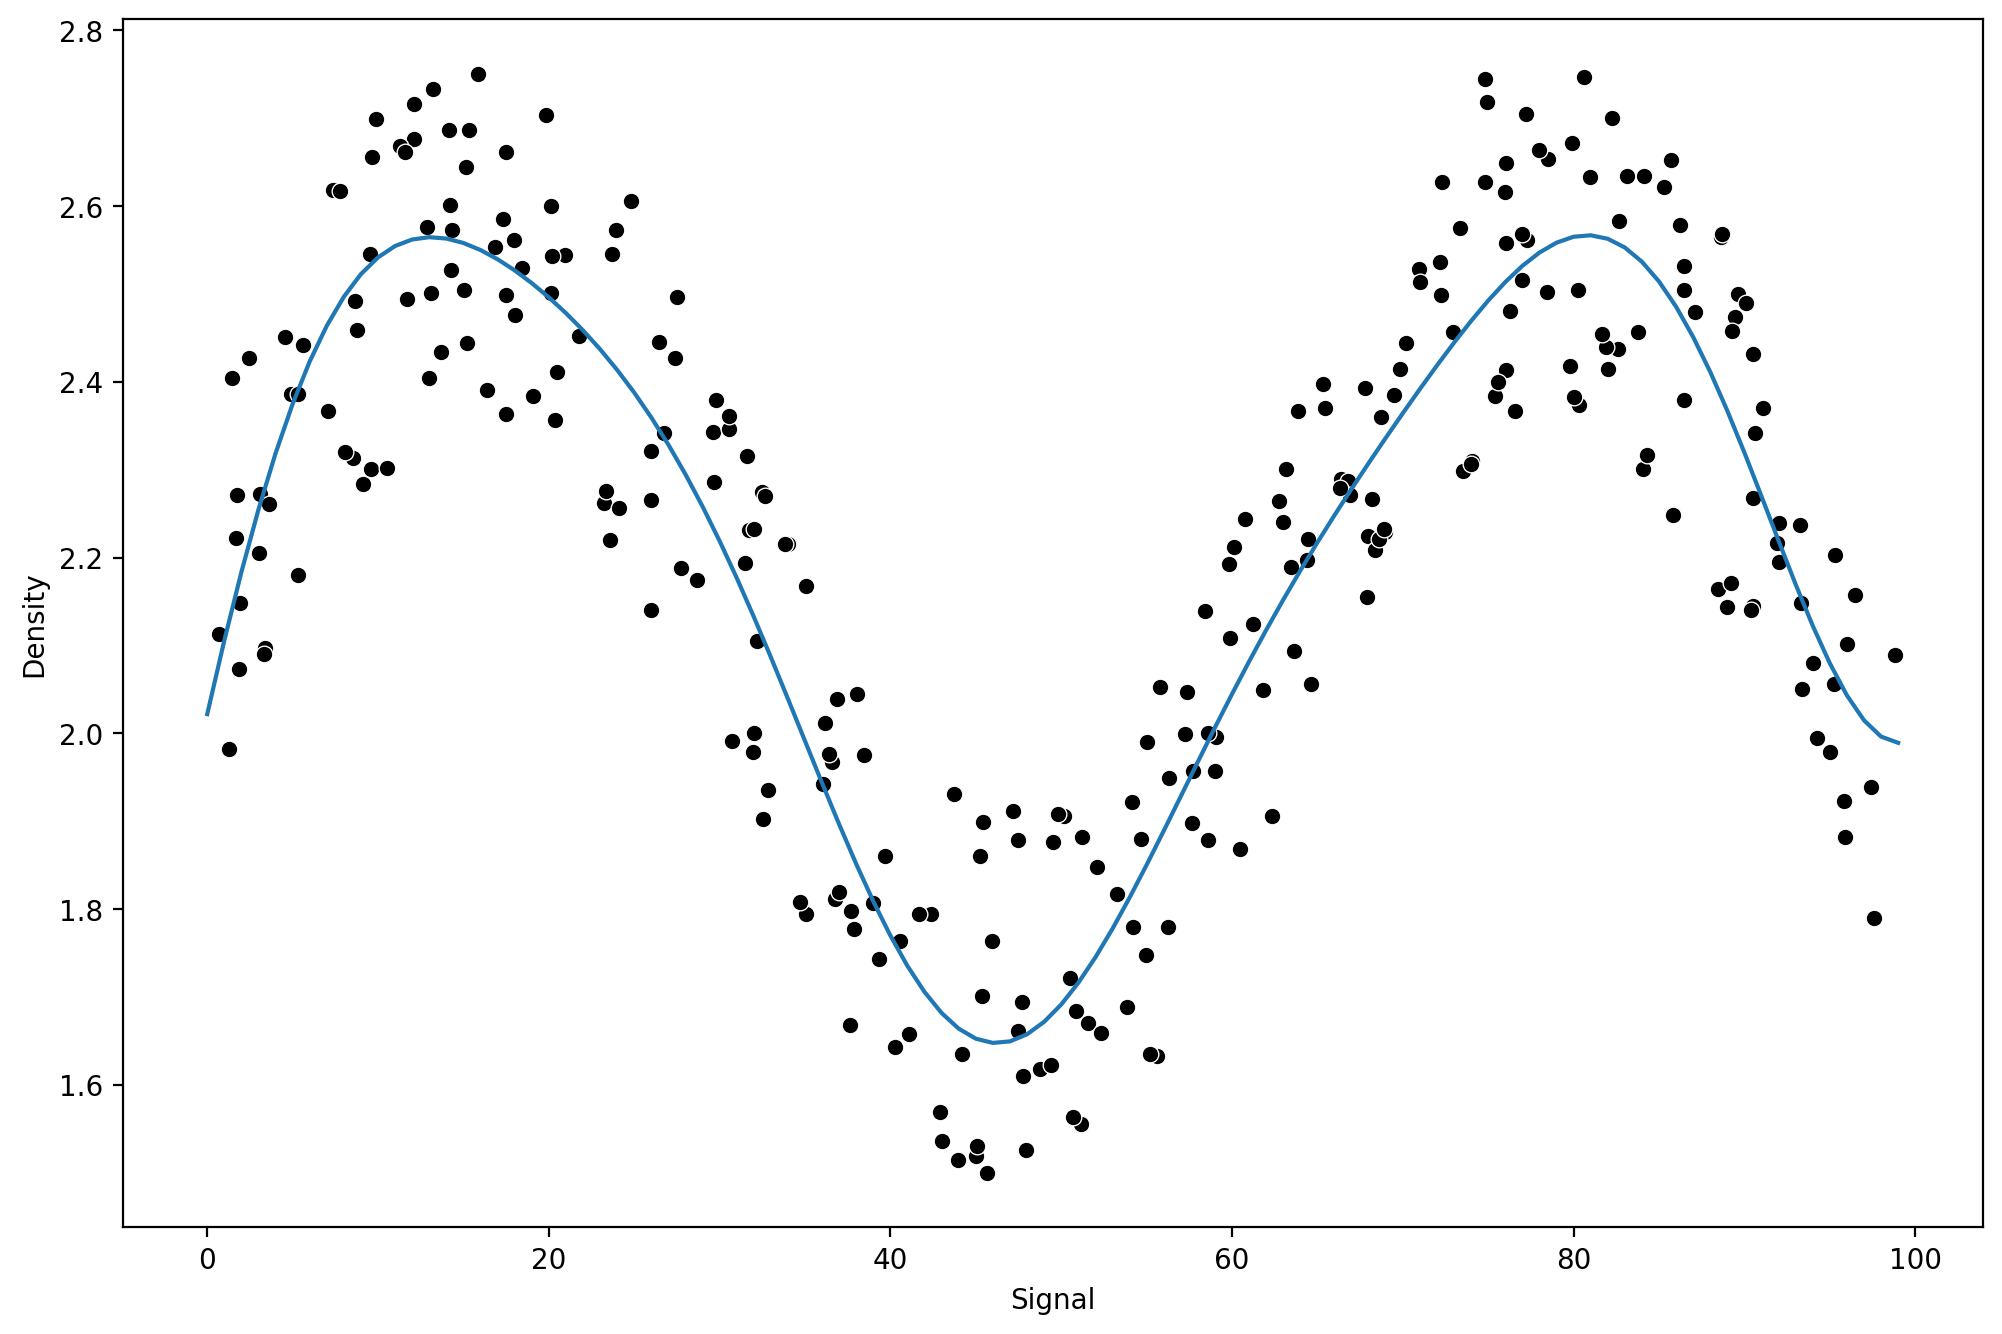

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}
grid = GridSearchCV(svr,param_grid)
run_model(grid,x_train,x_test,y_train,y_test)

MAE:0.11931702749001394
RMSE:0.14376033419692258


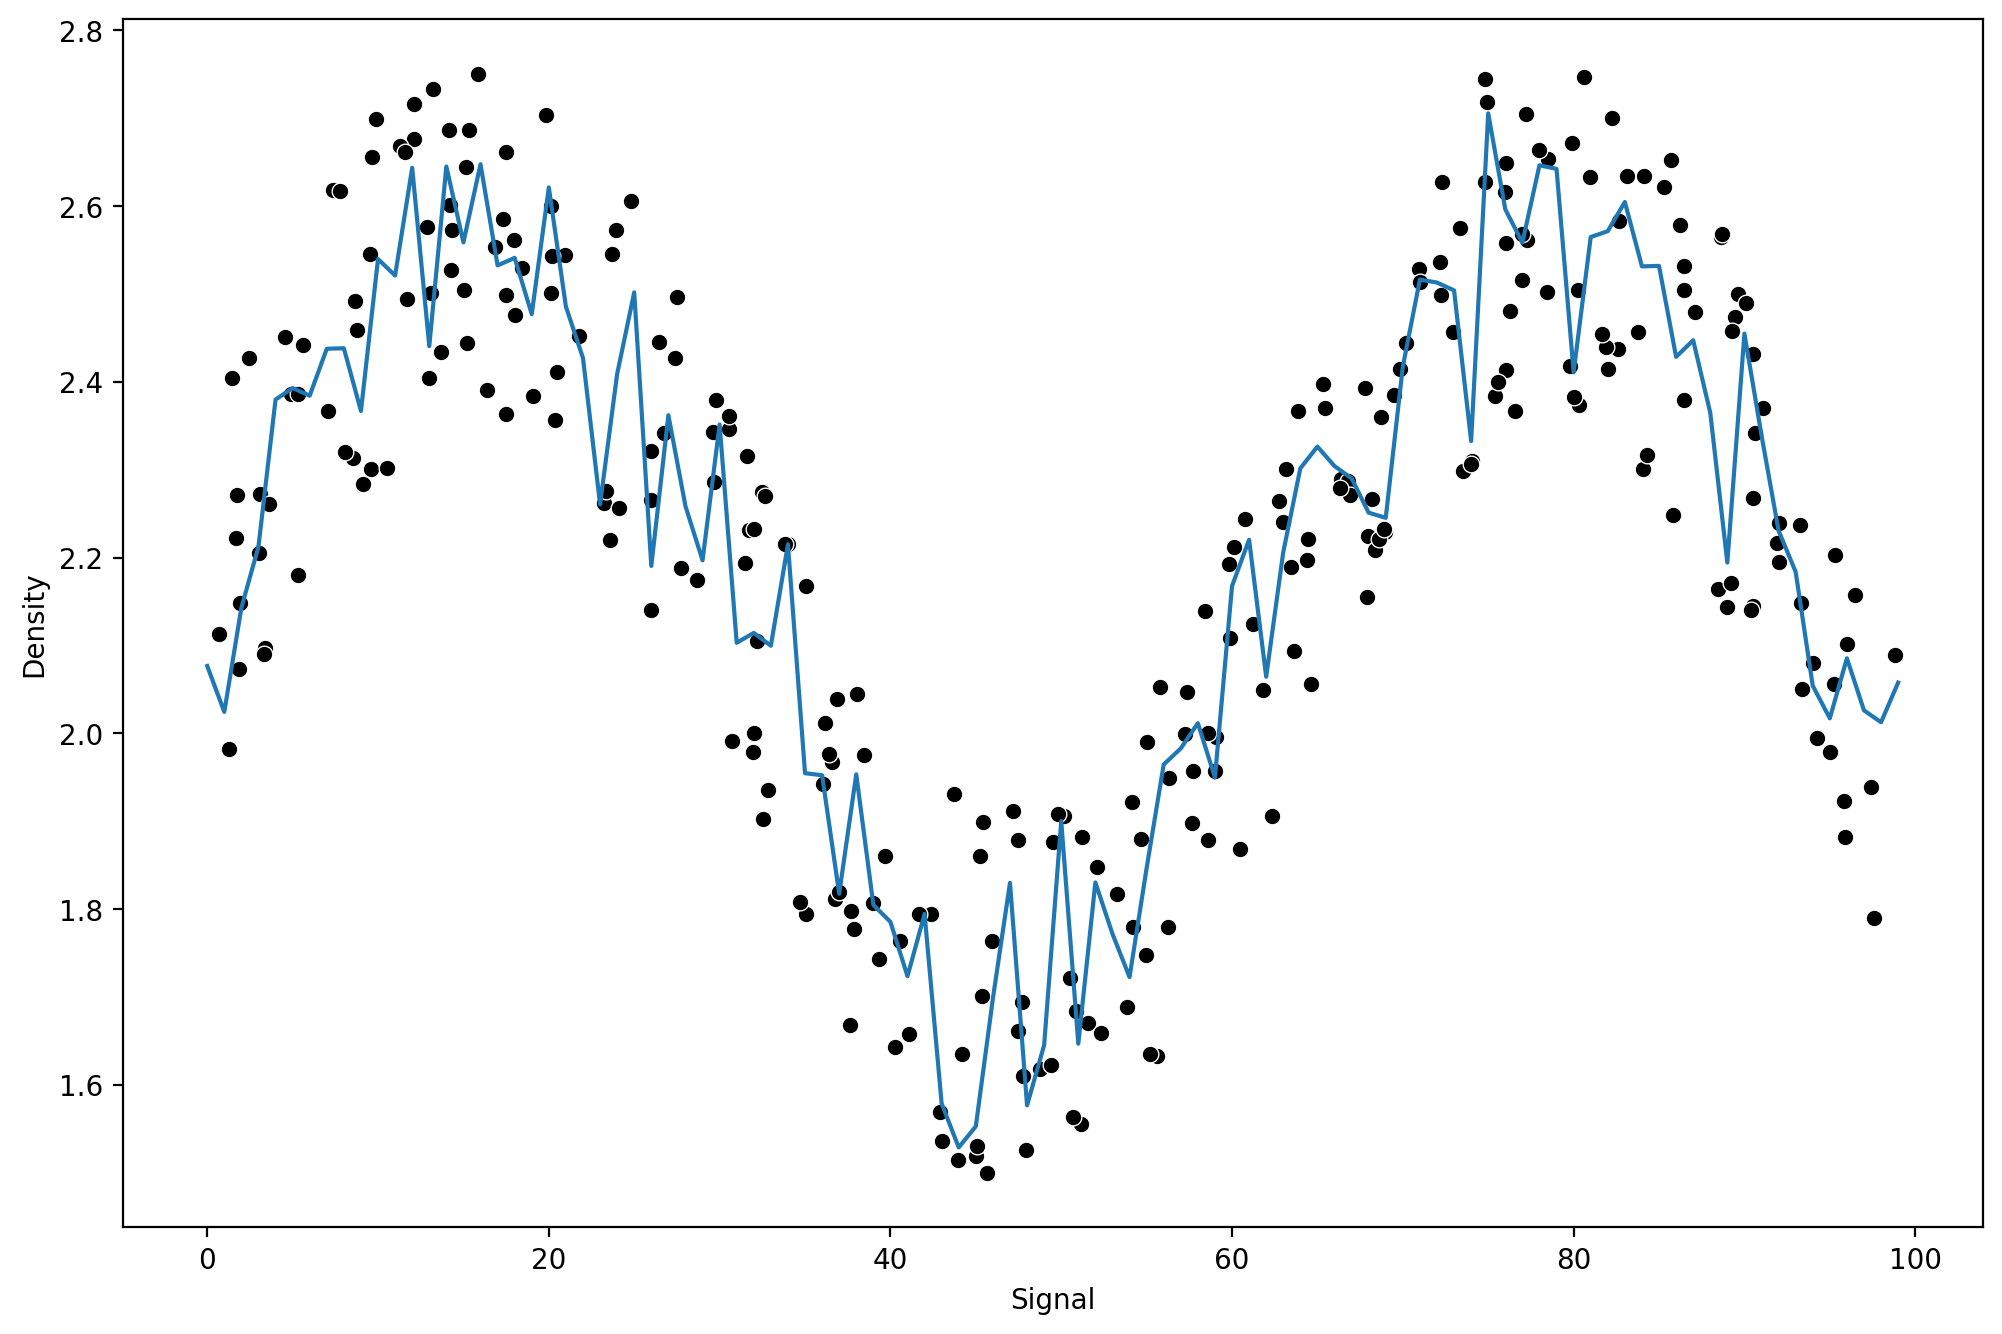

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
run_model(rfr,x_train,x_test,y_train,y_test)

MAE:0.11318284854800689
RMSE:0.13294148649584667


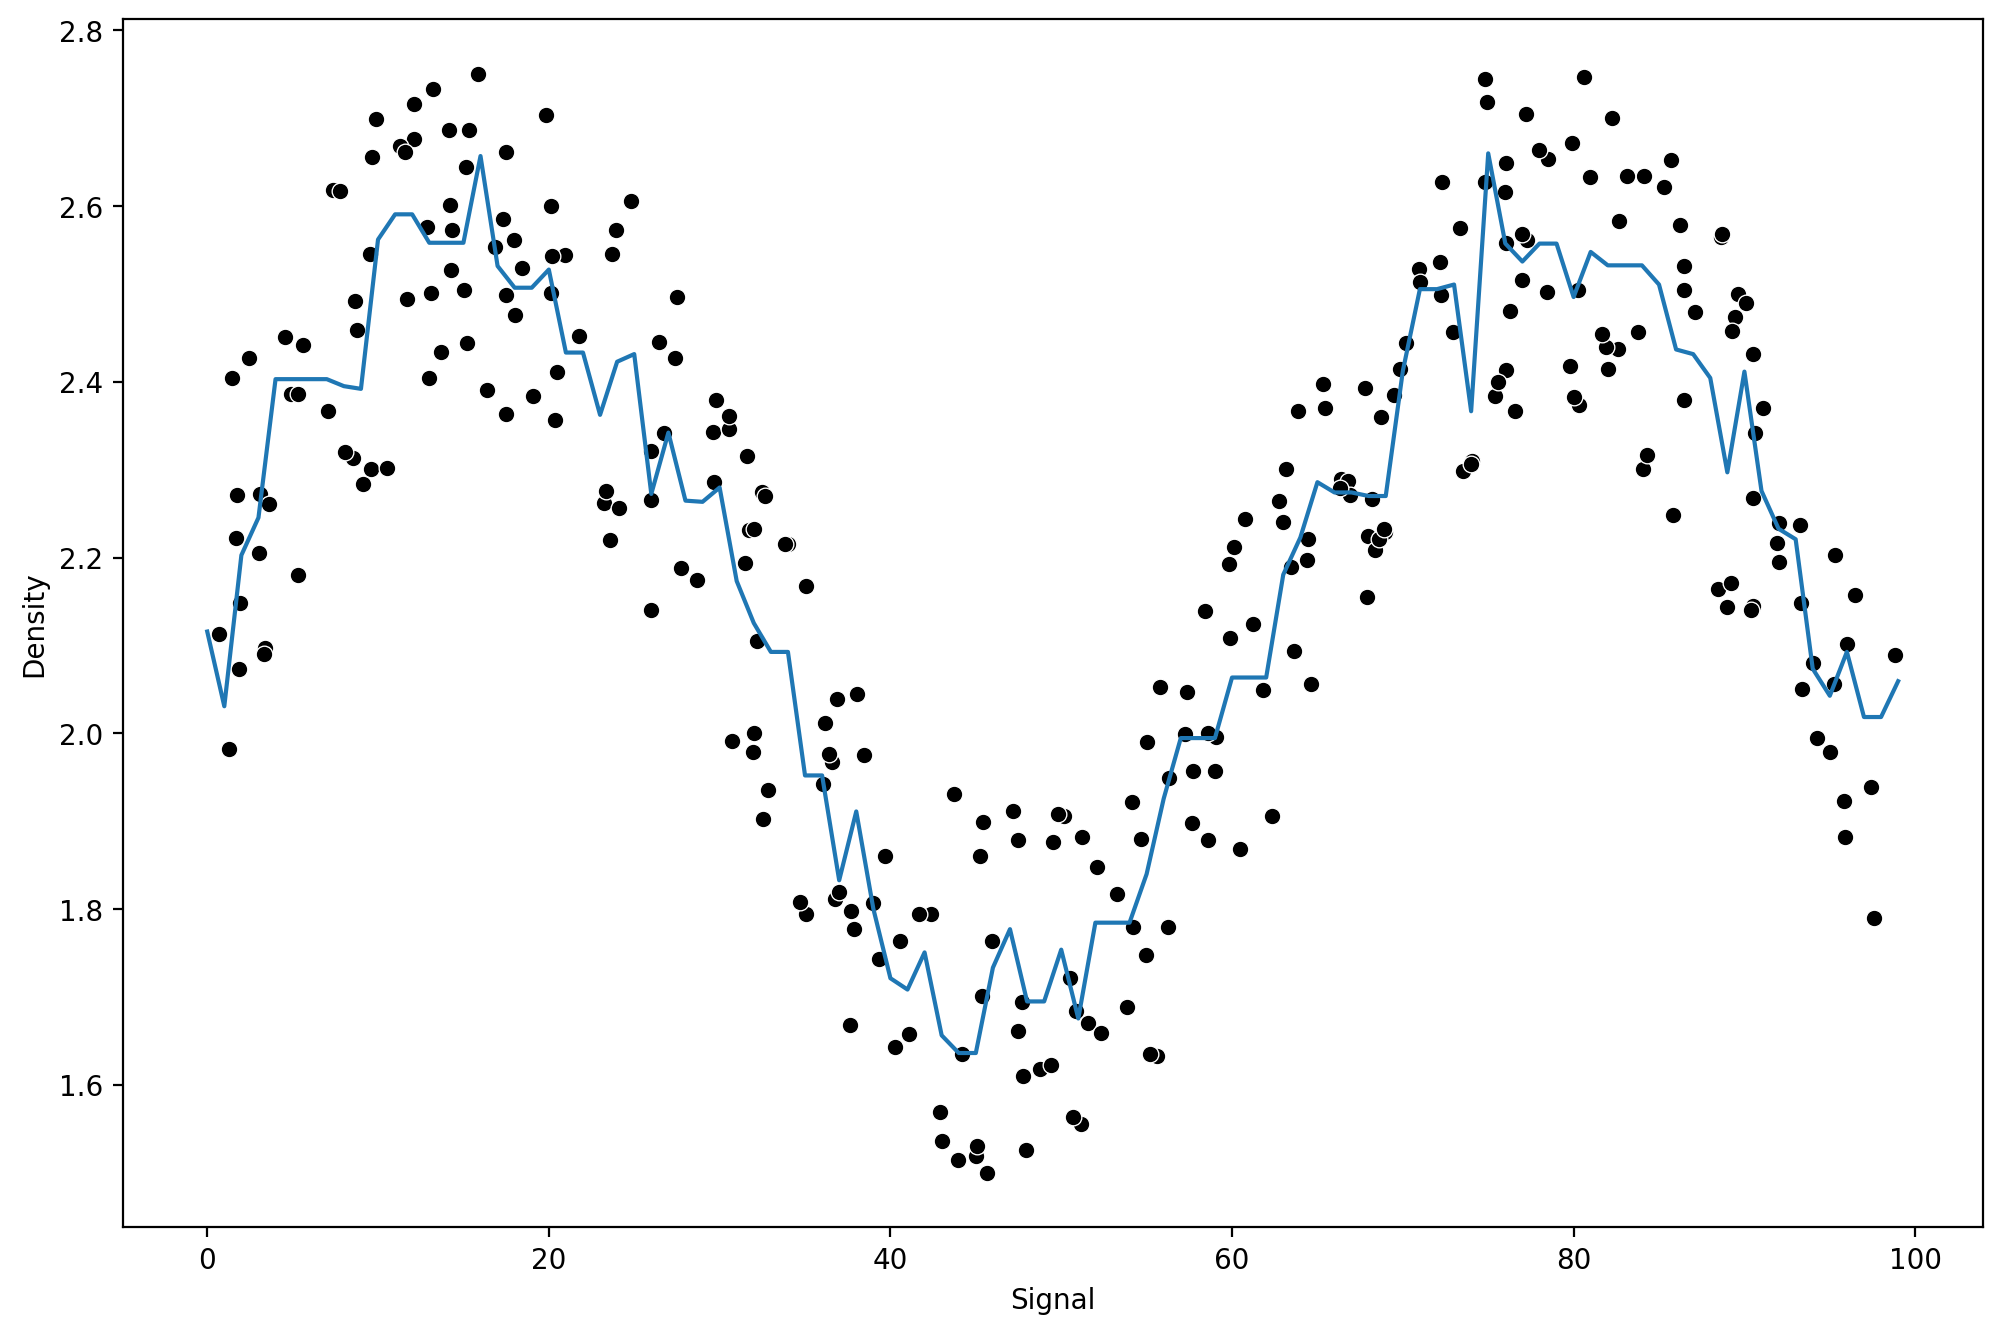

In [38]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

model = GradientBoostingRegressor()
run_model(model,x_train,x_test,y_train,y_test)